In [1]:
# import package

from typing import List, TypedDict
from langgraph.graph import StateGraph


In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    status: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    """1st sequence node"""

    state["status"] = f"Person is -- {state["name"]} --" 
    return state

def second_node(state: AgentState) -> AgentState:
    """2nd sequence node"""

    state["status"] = state["status"] + " &" + f" Age is -- {state["age"]} -- years old" 
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("1st_node", first_node)
graph.add_node("2nd_node", second_node)

graph.set_entry_point("1st_node")
graph.add_edge("1st_node", "2nd_node")
graph.set_finish_point("2nd_node")
app = graph.compile()

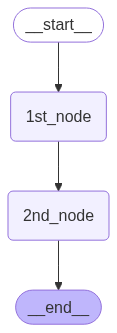

In [5]:
# import package
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"name" : "Jardani", "age" : 52, })
print("Continental Hotel Record: ")
print(result)

Continental Hotel Record: 
{'name': 'Jardani', 'age': 52, 'status': 'Person is -- Jardani -- & Age is -- 52 -- years old'}
